In [7]:
import pandas as pd
from datetime import datetime
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as plyo
import cufflinks as cf

In [2]:
url = 'https://github.com/jwkuyper/IOWA_test/blob/main/Dataset10.18.xlsx?raw=true'
df = pd.read_excel(url, sheet_name='Sheet1', parse_dates=['date'])
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [3]:
df0 = df.dropna()
Index_ByLocation = df0.groupby(['date', 'location']).stringency_index.mean()
Index_ByLocation

date        location
2020-03-11  Thailand    25.00
2020-03-12  Thailand    25.00
2020-03-16  Thailand    33.80
2020-03-19  Thailand    48.61
2020-03-20  India       70.83
                        ...  
2020-10-14  Pakistan    37.50
            Thailand    43.52
            Togo        47.22
2020-10-15  Pakistan    37.50
            Thailand    43.52
Name: stringency_index, Length: 3921, dtype: float64

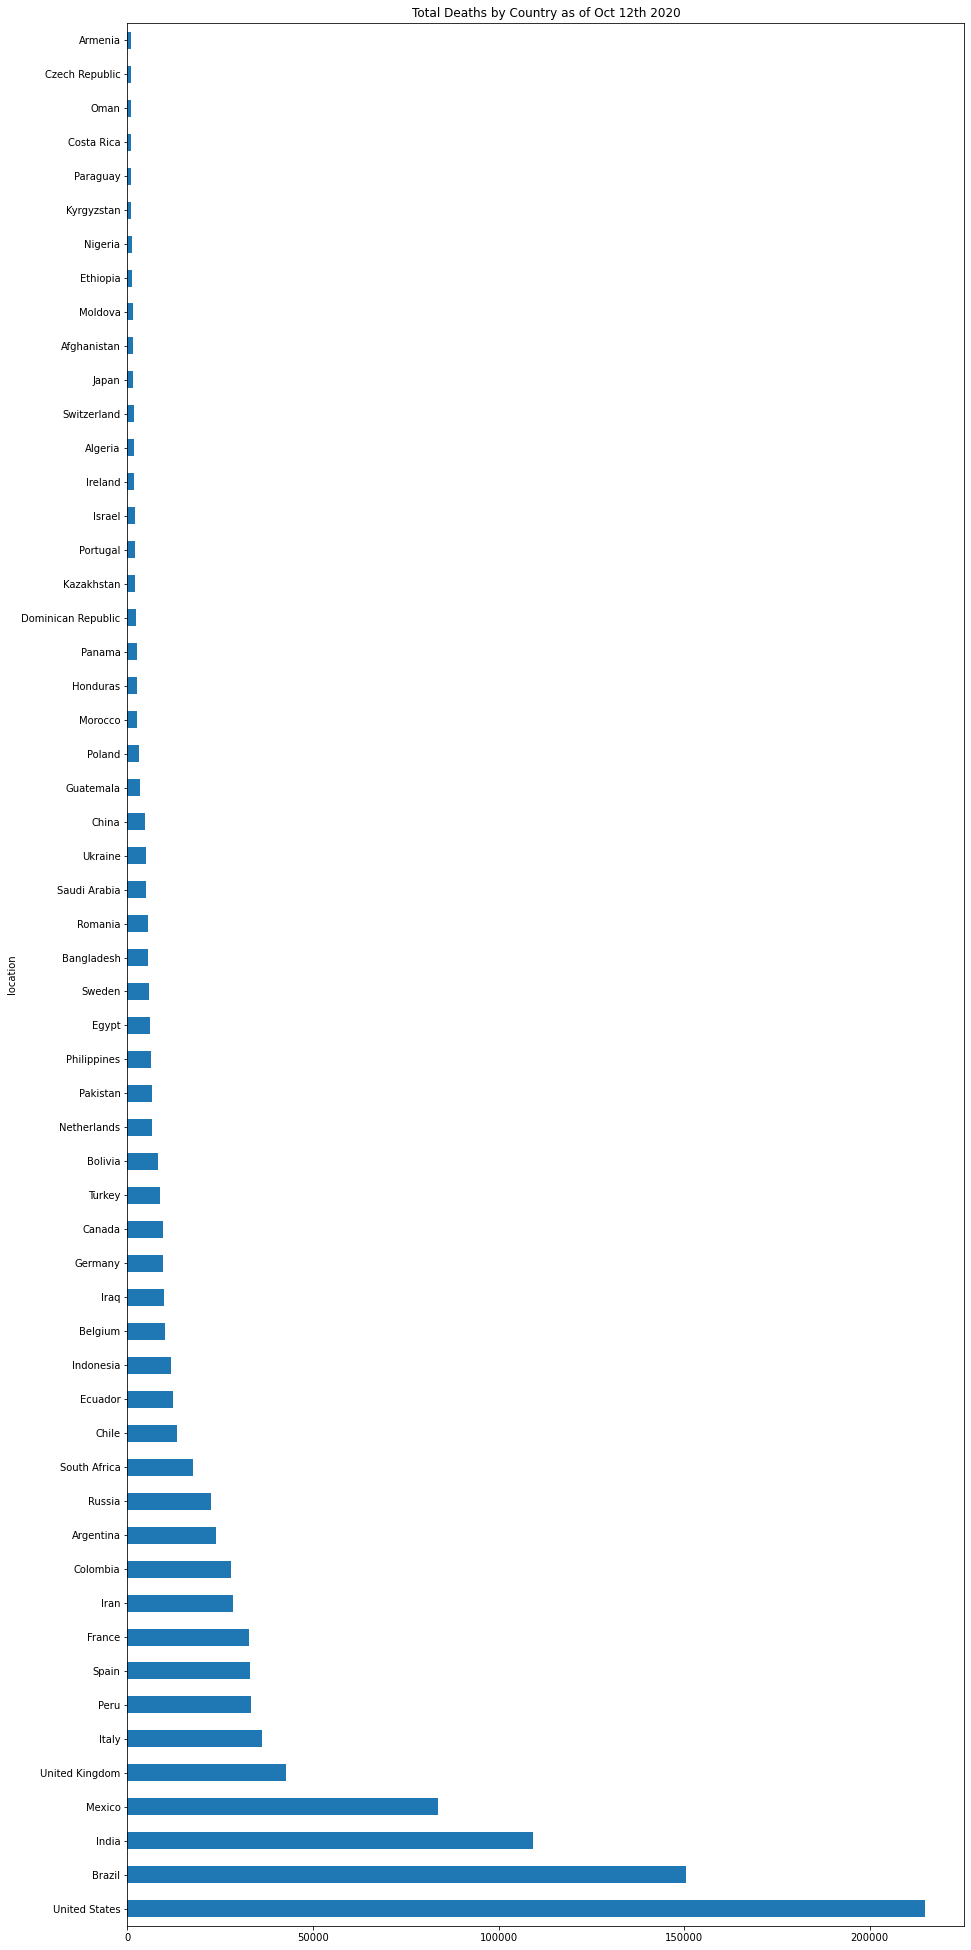

In [4]:
df2 = df[(df.date == "2020-10-12") & (df.location!="World") & (df.total_deaths<500000) & (df.total_deaths>1000)]

series1 = df2.groupby('location').total_deaths.sum()
series1 = series1.sort_values(ascending=False)

series1.plot(kind="barh", title="Total Deaths by Country as of Oct 12th 2020", figsize=(15,35))

In [19]:
series2 = df[(df.location=="World")]
series2 = df.groupby('date').total_deaths.sum()
plyo.iplot(series2.iplot(asFigure=True
                          ,title='World Deaths Over Time'
                          ,theme='polar'
                          ,xTitle='Date'
                          ,yTitle='Total Deaths'))

In [ ]:
#need a better way to take out null values
df1 = df[['continent','date','stringency_index']]
df2 = df1[(df1.date<'2020-10-13')].dropna()
df2.tail()

In [36]:
series3 = pd.pivot_table(df, values='total_deaths', 
                     columns=['continent'], 
                     index='date')
plyo.iplot(series3.iplot(asFigure=True
                          ,title='Deaths by Continent Over Time'
                          ,theme='polar'
                          ,xTitle='Date'
                          ,yTitle='Total Deaths'))